##**Problem Statement**

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.



#**Objective**


*  Analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.





#**Data Dictionary**

* brand_name: Name of manufacturing brand
* os: OS on which the device runs
* screen_size: Size of the screen in cm
* 4g: Whether 4G is available or not
* 5g: Whether 5G is available or not
* main_camera_mp: Resolution of the rear camera in megapixels
* selfie_camera_mp: Resolution of the front camera in megapixels
* int_memory: Amount of internal memory (ROM) in GB
* ram: Amount of RAM in GB
* battery: Energy capacity of the device battery in mAh
* weight: Weight of the device in grams
* release_year: Year when the device model was released
* days_used: Number of days the used/refurbished device has been used
* normalized_new_price: Normalized price of a new device of the same model in euros
* normalized_used_price: Normalized price of the used/refurbished device in euros

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = "/content/drive/MyDrive/used_device_data.csv" 
df = pd.read_csv(df)
df

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [14]:
df.shape

(3454, 15)

* There are 3454 rows and 15 columns in the dataset.

In [20]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


* The dataset contains information about refubrished phones with different types of specifications.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* Most of the columns in the data are numeric in nature ('int64' or 'float64' type).
* The brand name, os, 4g and 5g columns are string columns ('object' type).
* Normalized_used_price is the dependent variable.

In [22]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


* There are 34 types of brands in the dataset.
* There are 4 operating systems.
* The screen size of these phones ranges from 5.8 to 30.71 cm.
*  Resolution of the rear and front camera have an a mean of 9.46 and 6.55 megapixels repectively.
* Ram ranges from 0.2 to 12.0 with an average of 4.03 GB.
* The most amount of days a phone was used is 1094.
* The price for normalized used phone ranges from 1.53 to 6.619 with an average price of 4.36
* The price for normalized new phone ranges from 2.90 to 7.84 with an average price of 4.79.

In [9]:
df.duplicated().sum()

0

* There are no duplicate value in the dataset.

In [10]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* There are missing values in many columns.
* main camera mp has the most missing value.
* There are a total of 202 miaaing values in the dataset.

In [23]:
data = df.copy()

* Creating a copy of the data so that original data remains unchanged.

#**Exploratory Data Analysis (EDA) Summary**

In [7]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  

In [15]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature]) 
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  
        else:
            label = p.get_height()  

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        ) 

    plt.show()

##Brand name

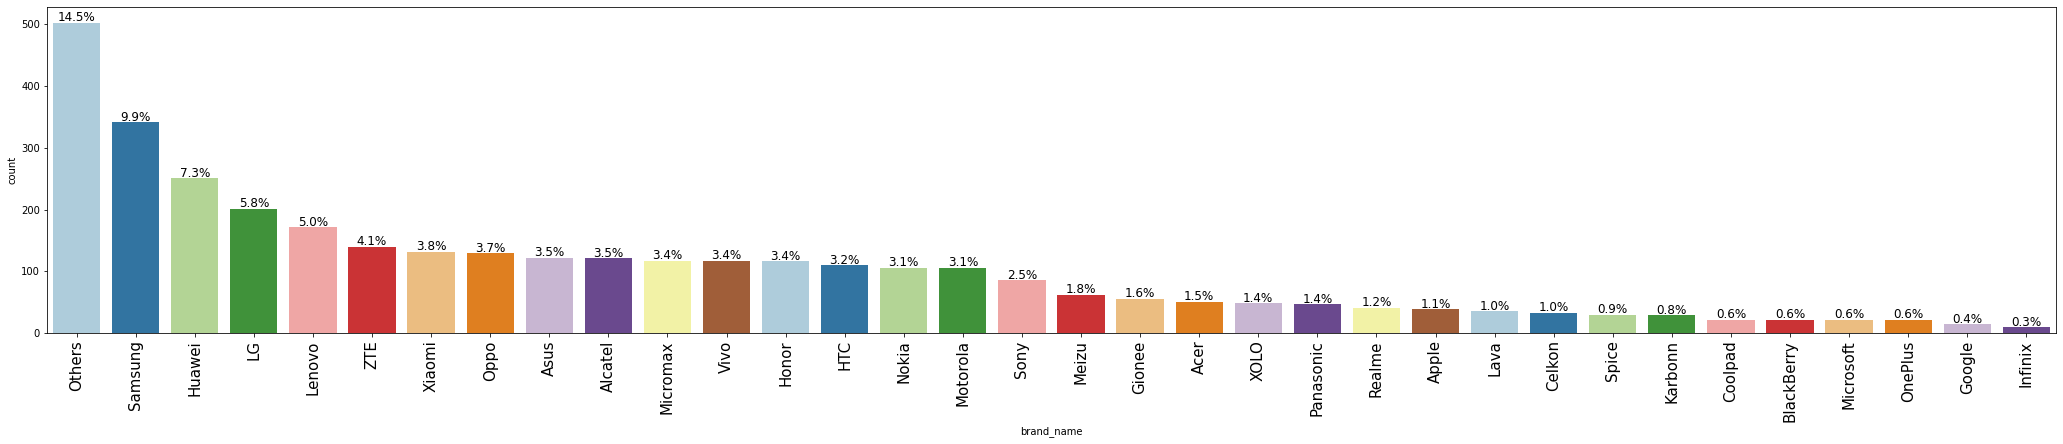

In [14]:
labeled_barplot(data, "brand_name", perc=True)

* The top three brands are "others", Samsung and Huawei.

##OS

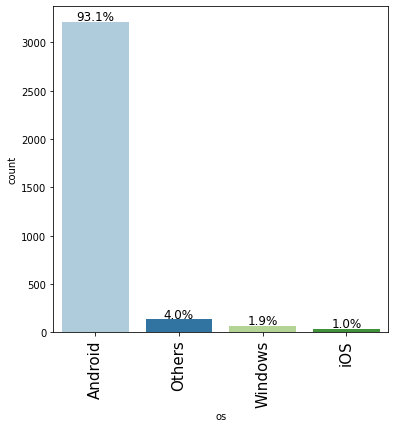

In [15]:
labeled_barplot(data, "os", perc=True)

* The most popular operation system is Android.

##4g

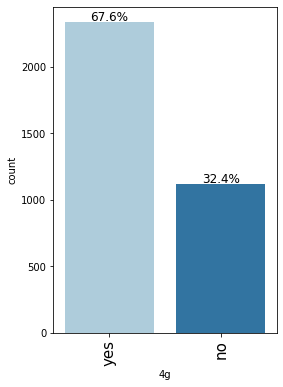

In [16]:
labeled_barplot(data, "4g", perc=True)

* 67.6% of the phones have 4G available while 32.4 do not.

##5g

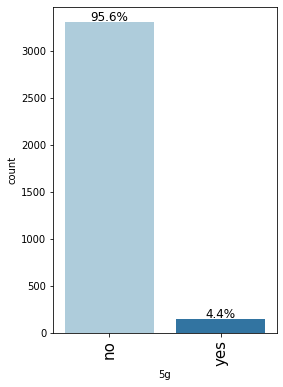

In [17]:
labeled_barplot(data, "5g", perc=True)

* A significant amount of phones have 5G available.

##Screen size

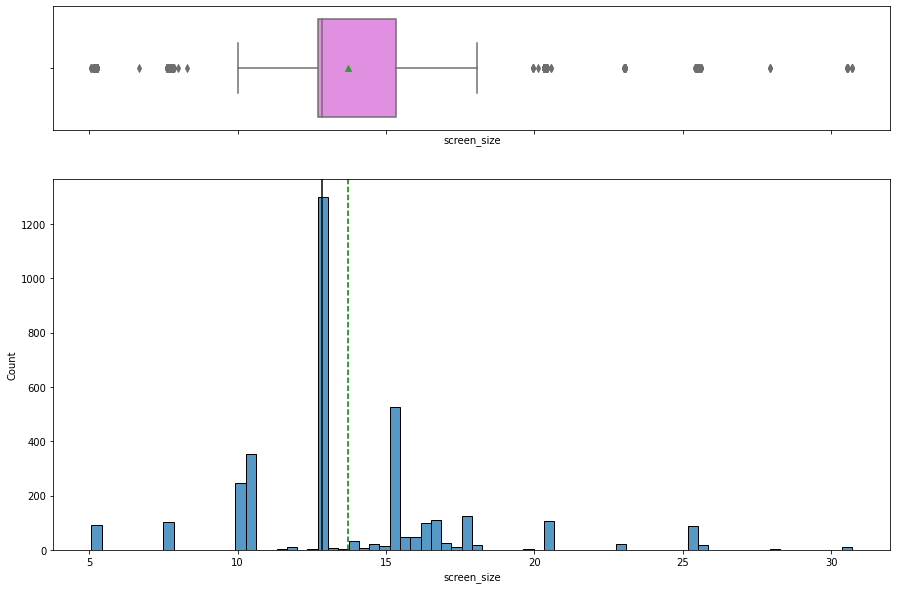

In [19]:
histogram_boxplot(data, "screen_size")

In [10]:
data['screen_size'].describe()

count    3454.000000
mean       13.713115
std         3.805280
min         5.080000
25%        12.700000
50%        12.830000
75%        15.340000
max        30.710000
Name: screen_size, dtype: float64

* As shown on the above, the mean screen size is 13.7 cm.
* The maximum and minimum size phone screen are 5.08 and 30.7 cm.



##Main camera mp.

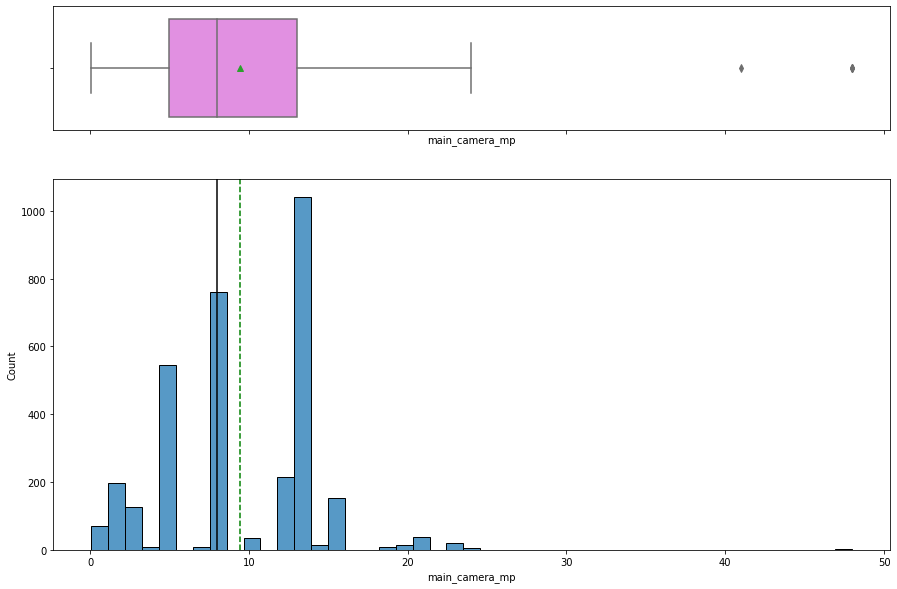

In [9]:
histogram_boxplot(data, "main_camera_mp")

In [11]:
data['main_camera_mp'].describe()

count    3275.000000
mean        9.460208
std         4.815461
min         0.080000
25%         5.000000
50%         8.000000
75%        13.000000
max        48.000000
Name: main_camera_mp, dtype: float64

* The average resolution of the rear camera in megapixels is 9.46.
* The distribution fis heavily right-skewed. 

##Selfie camera mp

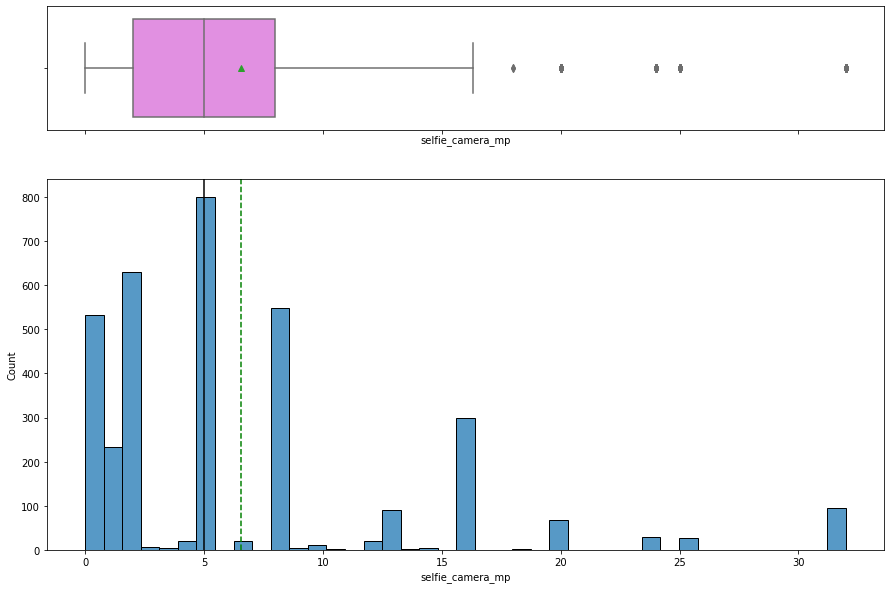

In [21]:
histogram_boxplot(data, "selfie_camera_mp")

In [12]:
data['selfie_camera_mp'].describe()

count    3452.000000
mean        6.554229
std         6.970372
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        32.000000
Name: selfie_camera_mp, dtype: float64

*  The mean resolution of the front camera in megapixels is 6.55. while the minimun and the maximum resoultion are 0 and 32 repectively.
* The distribution is heavily right-skewed.


##Internal memeory 

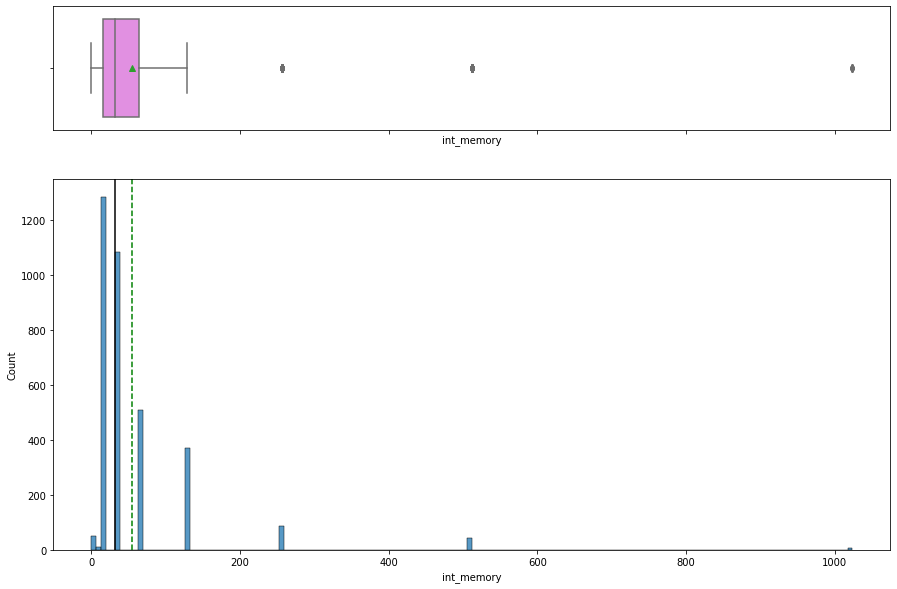

In [22]:
histogram_boxplot(data, "int_memory")

In [13]:
data['int_memory'].describe()

count    3450.000000
mean       54.573099
std        84.972371
min         0.010000
25%        16.000000
50%        32.000000
75%        64.000000
max      1024.000000
Name: int_memory, dtype: float64

* The distribution is heavily right-skewed.
* The mean amount of internal memory is 54.57 GB.
* The maximum amount in GB is 1024.0 which is very high compared to the minimum which is 0.

## Ram

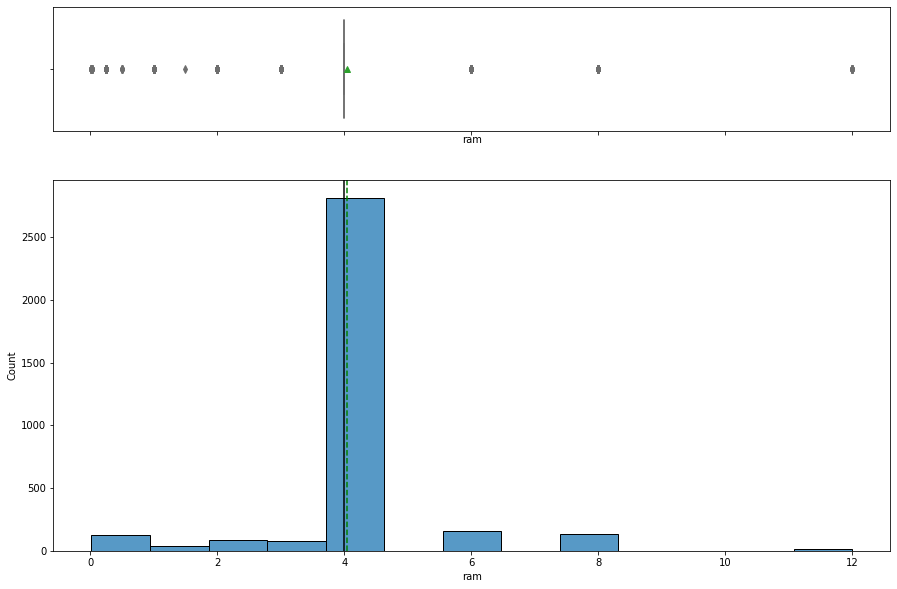

In [14]:
histogram_boxplot(data, "ram")

In [15]:
data['ram'].describe()

count    3450.000000
mean        4.036122
std         1.365105
min         0.020000
25%         4.000000
50%         4.000000
75%         4.000000
max        12.000000
Name: ram, dtype: float64

* There are a lot of outliers on this dataframe.
* Ram ranges from 0 to 12 with an average of 4.0.

##Battery

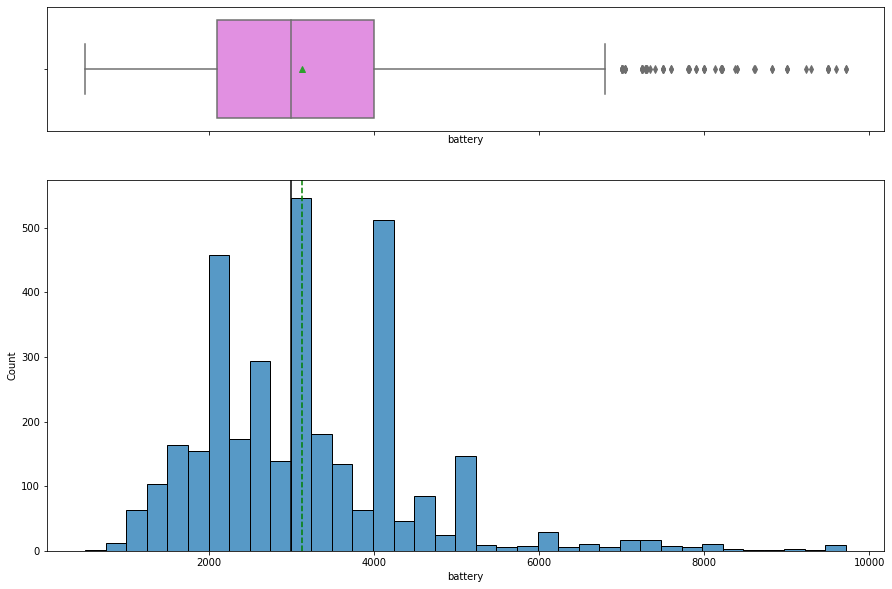

In [16]:
histogram_boxplot(data, "battery")

In [17]:
data['battery'].describe()

count    3448.000000
mean     3133.402697
std      1299.682844
min       500.000000
25%      2100.000000
50%      3000.000000
75%      4000.000000
max      9720.000000
Name: battery, dtype: float64

* As shown, energy capacity of the device battery ranges from 500 to 9720 mAh with an average of 3133.

##Weight

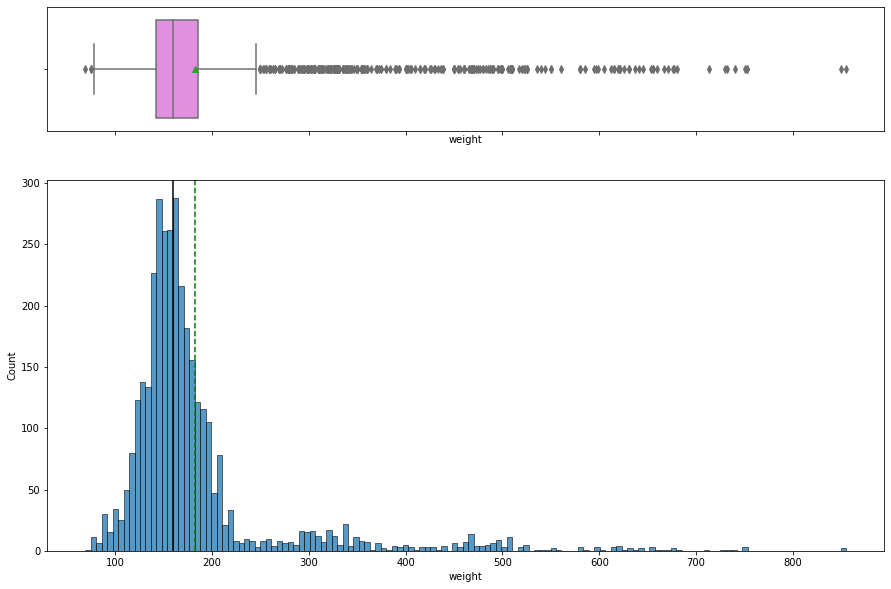

In [18]:
histogram_boxplot(data, "weight")

In [22]:
data['weight'].describe()

count    3447.000000
mean      182.751871
std        88.413228
min        69.000000
25%       142.000000
50%       160.000000
75%       185.000000
max       855.000000
Name: weight, dtype: float64

*  The distribution is heavily right-skewed with the maximum weight being 855 grams and minimum being 69 grams.


## Release year

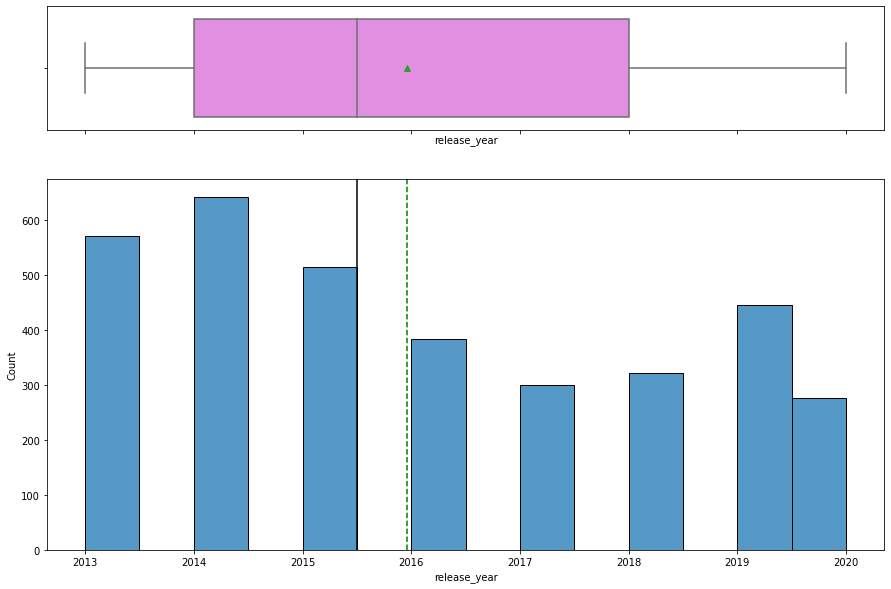

In [19]:
histogram_boxplot(data, "release_year")

In [8]:
data['release_year'].describe()

count    3454.000000
mean     2015.965258
std         2.298455
min      2013.000000
25%      2014.000000
50%      2015.500000
75%      2018.000000
max      2020.000000
Name: release_year, dtype: float64

* The latest year a device was released is in 2020 while the oldest is 2013.
* The average release year is 2015.

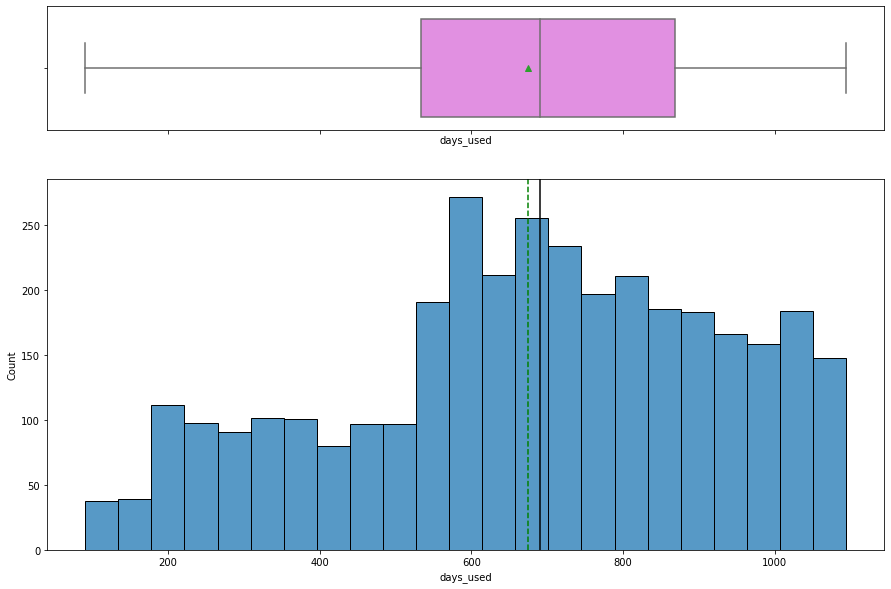

In [9]:
histogram_boxplot(data, "days_used")

In [10]:
data['days_used'].describe()

count    3454.000000
mean      674.869716
std       248.580166
min        91.000000
25%       533.500000
50%       690.500000
75%       868.750000
max      1094.000000
Name: days_used, dtype: float64

* The distribution is left-skewed.
* The most amount of days a deviced has been used is 1094 while the least is 91.
* The average amount of days used is 674.

##Normalized new price

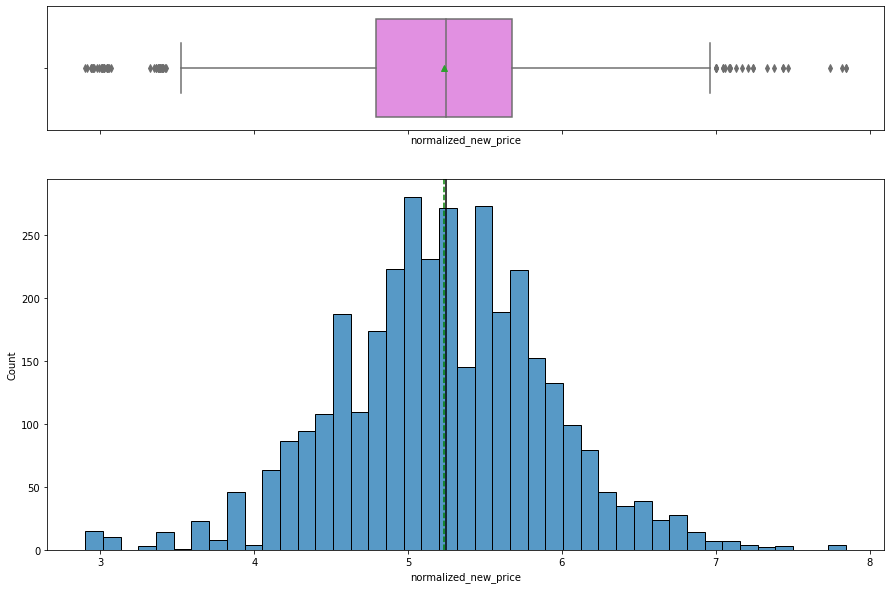

In [20]:
histogram_boxplot(data, "normalized_new_price")

In [11]:
data['normalized_new_price'].describe()

count    3454.000000
mean        5.233107
std         0.683637
min         2.901422
25%         4.790342
50%         5.245892
75%         5.673718
max         7.847841
Name: normalized_new_price, dtype: float64

* This distribution is normally distributed.
* The new price ranges from 2.9 to 7.8 euros.

## Normalized used price

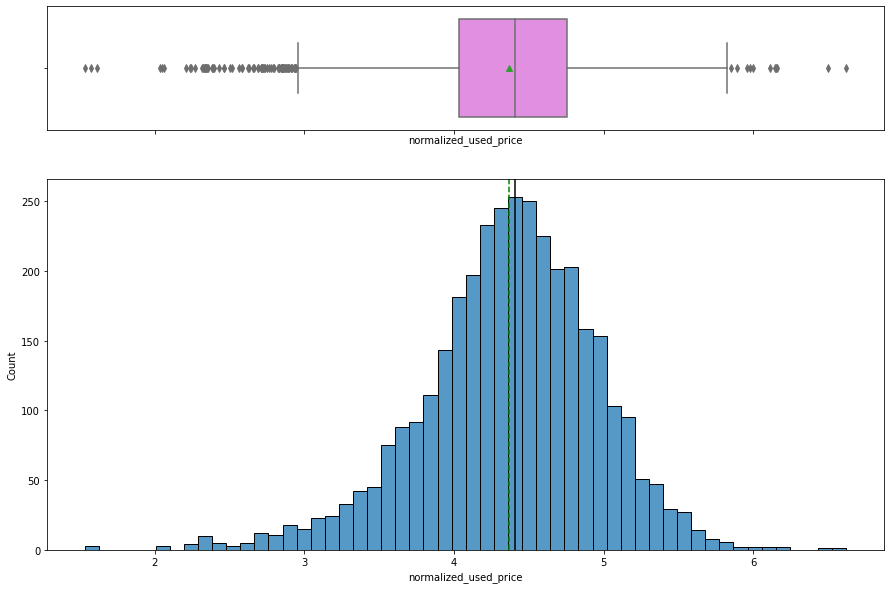

In [21]:
histogram_boxplot(data, "normalized_used_price")

In [12]:
data['normalized_used_price'].describe()

count    3454.000000
mean        4.364712
std         0.588914
min         1.536867
25%         4.033931
50%         4.405133
75%         4.755700
max         6.619433
Name: normalized_used_price, dtype: float64

* This is also normally distributed.
* Used/refurished devices cost from 1.5 to 6.6 euros.

#Bivariate Analysis

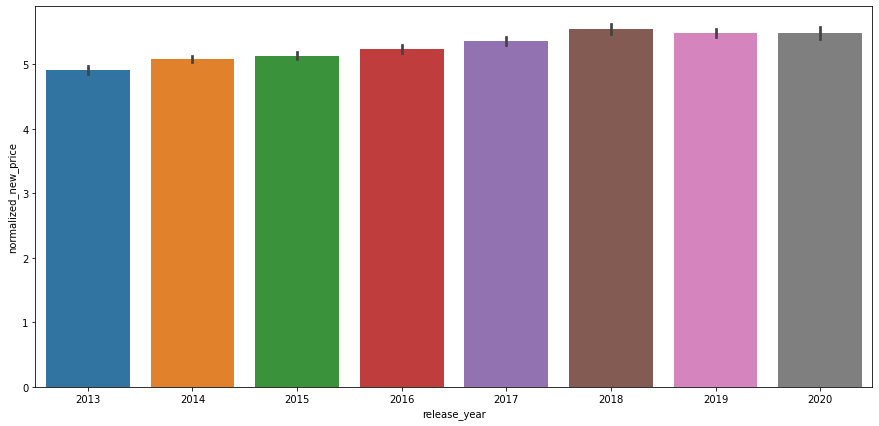

In [15]:
plt.figure(figsize=(15, 7))
sns.barplot(data=data, x="release_year", y="normalized_new_price")
plt.show()

* Devices released in 2018 seems to cost alittle bit higher than the rest. while devices released in 2013 cost less.

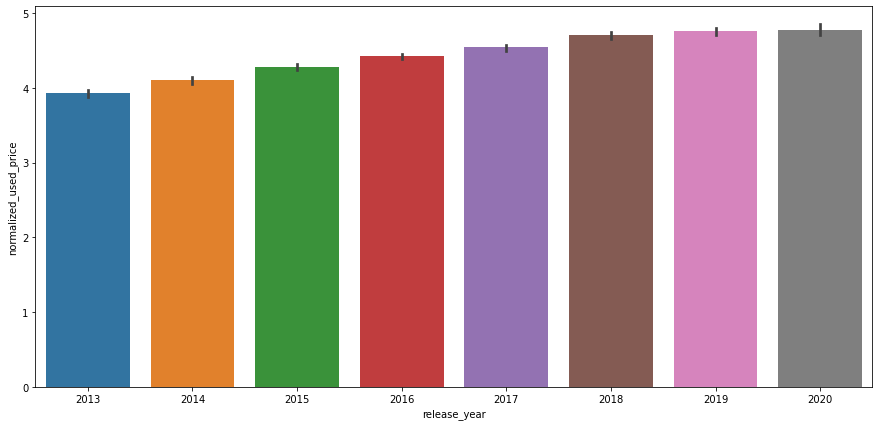

In [16]:
plt.figure(figsize=(15, 7))
sns.barplot(data=data, x="release_year", y="normalized_used_price")
plt.show()

* Devices with 2020 release year cost a bit higher than the rest. 

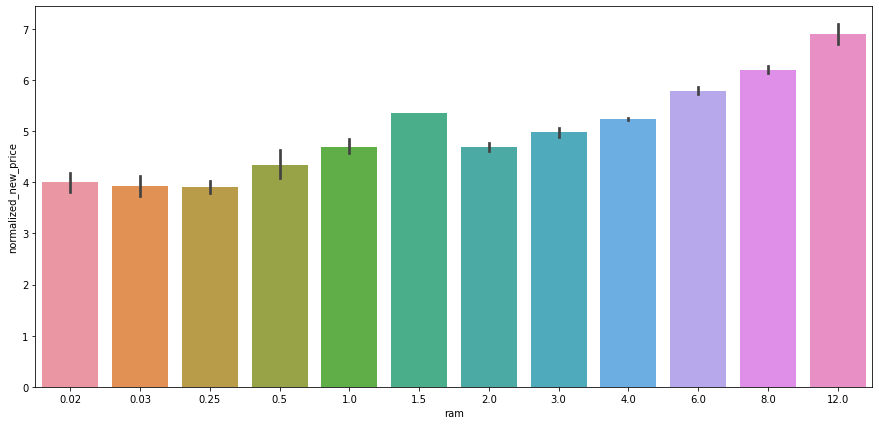

In [19]:
plt.figure(figsize=(15, 7))
sns.barplot(data=data, x="ram", y="normalized_new_price")
plt.show()

* As shown, the higher the ram, the higher the price.

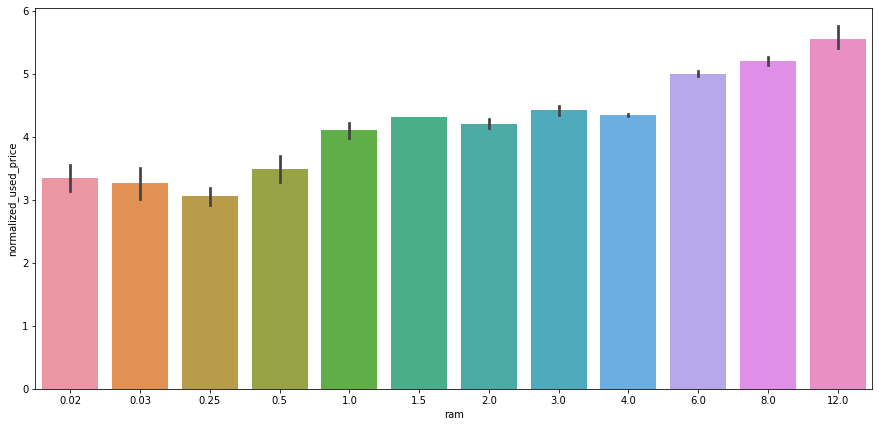

In [20]:
plt.figure(figsize=(15, 7))
sns.barplot(data=data, x="ram", y="normalized_used_price")
plt.show()

* Similar to the above, as the RAM increases the price also tends to get high.

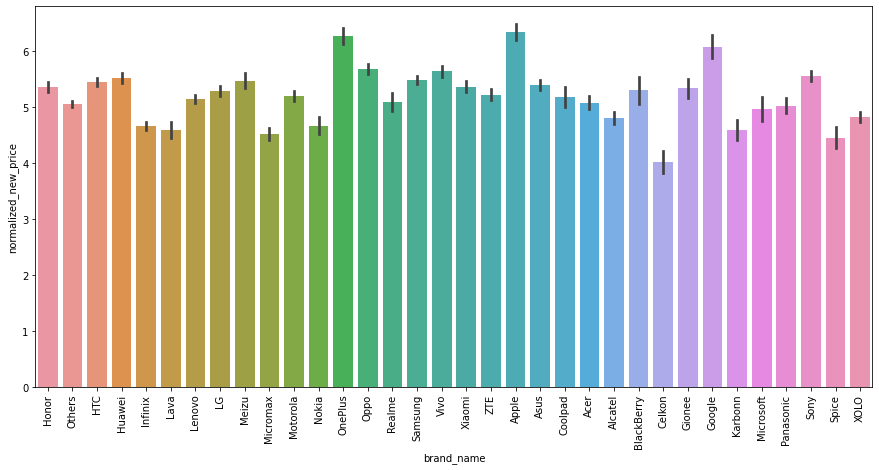

In [22]:
plt.figure(figsize=(15, 7))
sns.barplot(data=data, x="brand_name", y="normalized_new_price")
plt.xticks(rotation=90)
plt.show()

* The top three brands that have a high normalized new price are OnePlus, Apple and Google.

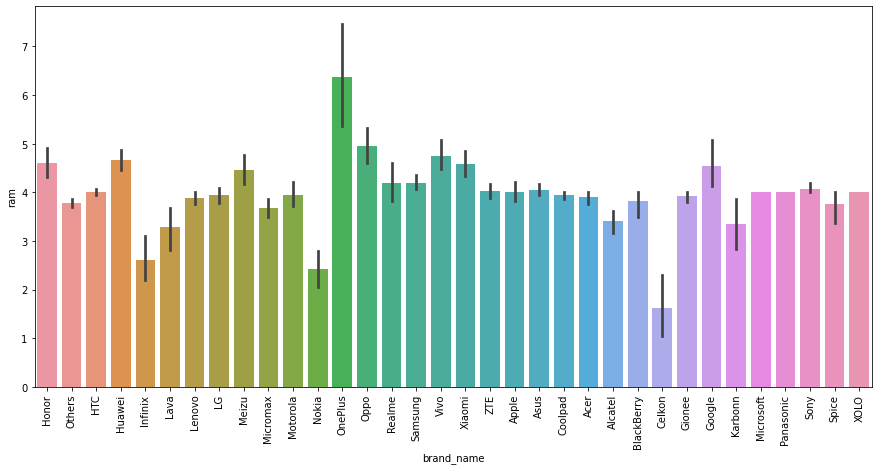

In [23]:
plt.figure(figsize=(15, 7))
sns.barplot(data=data, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

* OnePlus has the highest Ram while Celkon has the lowest.

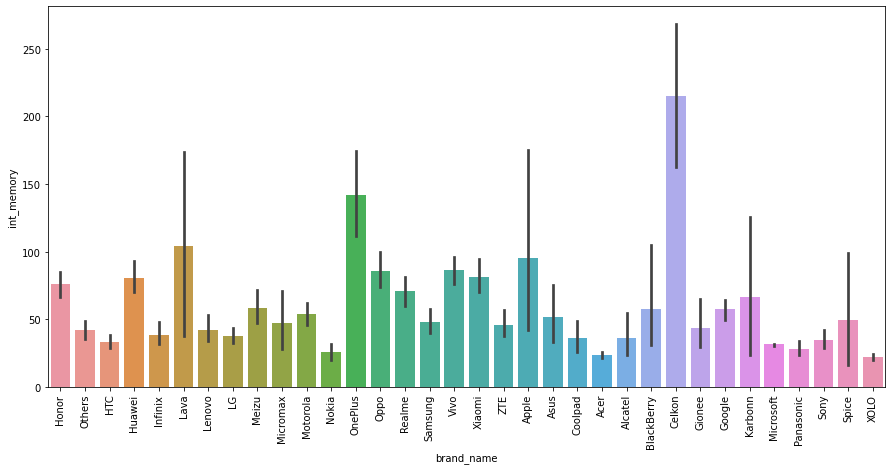

In [24]:
plt.figure(figsize=(15, 7))
sns.barplot(data=data, x="brand_name", y="int_memory")
plt.xticks(rotation=90)
plt.show()

* Celkon has the highest internal memory while Acer has the lowest.

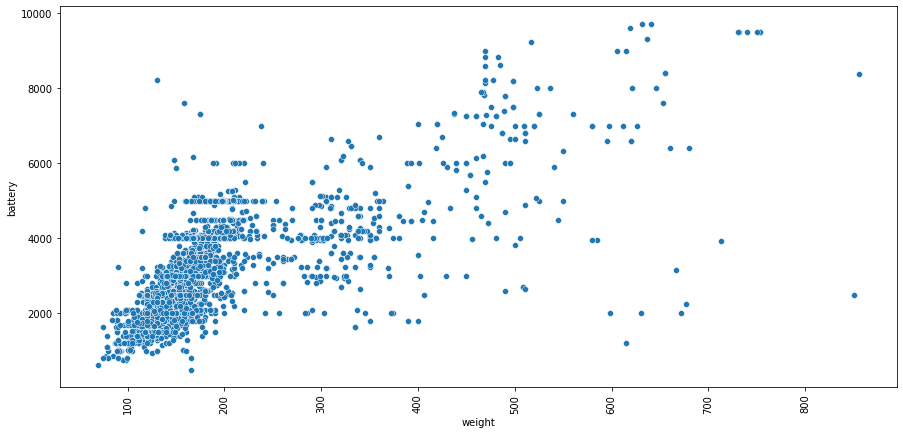

In [25]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=data, x="weight", y="battery")
plt.xticks(rotation=90)
plt.show()

* It seems like most of the distributions are scattered around the same area.

#Multivariate analysis

In [36]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()
num_cols.remove("days_used")
num_cols.remove("release_year")

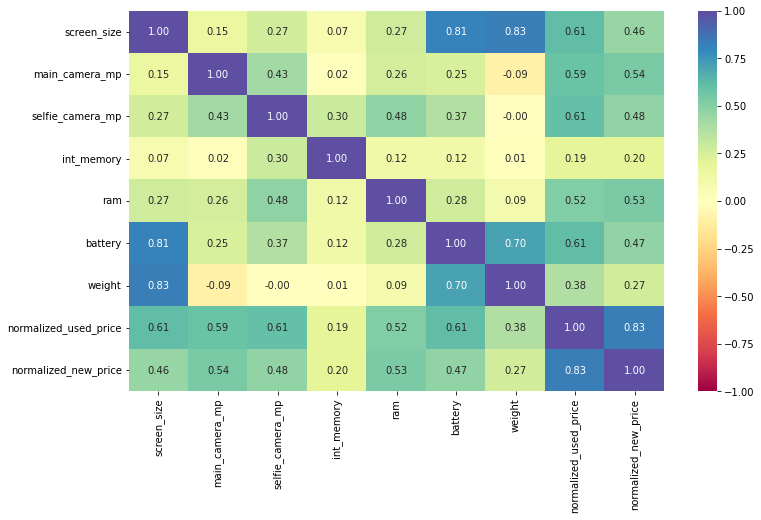

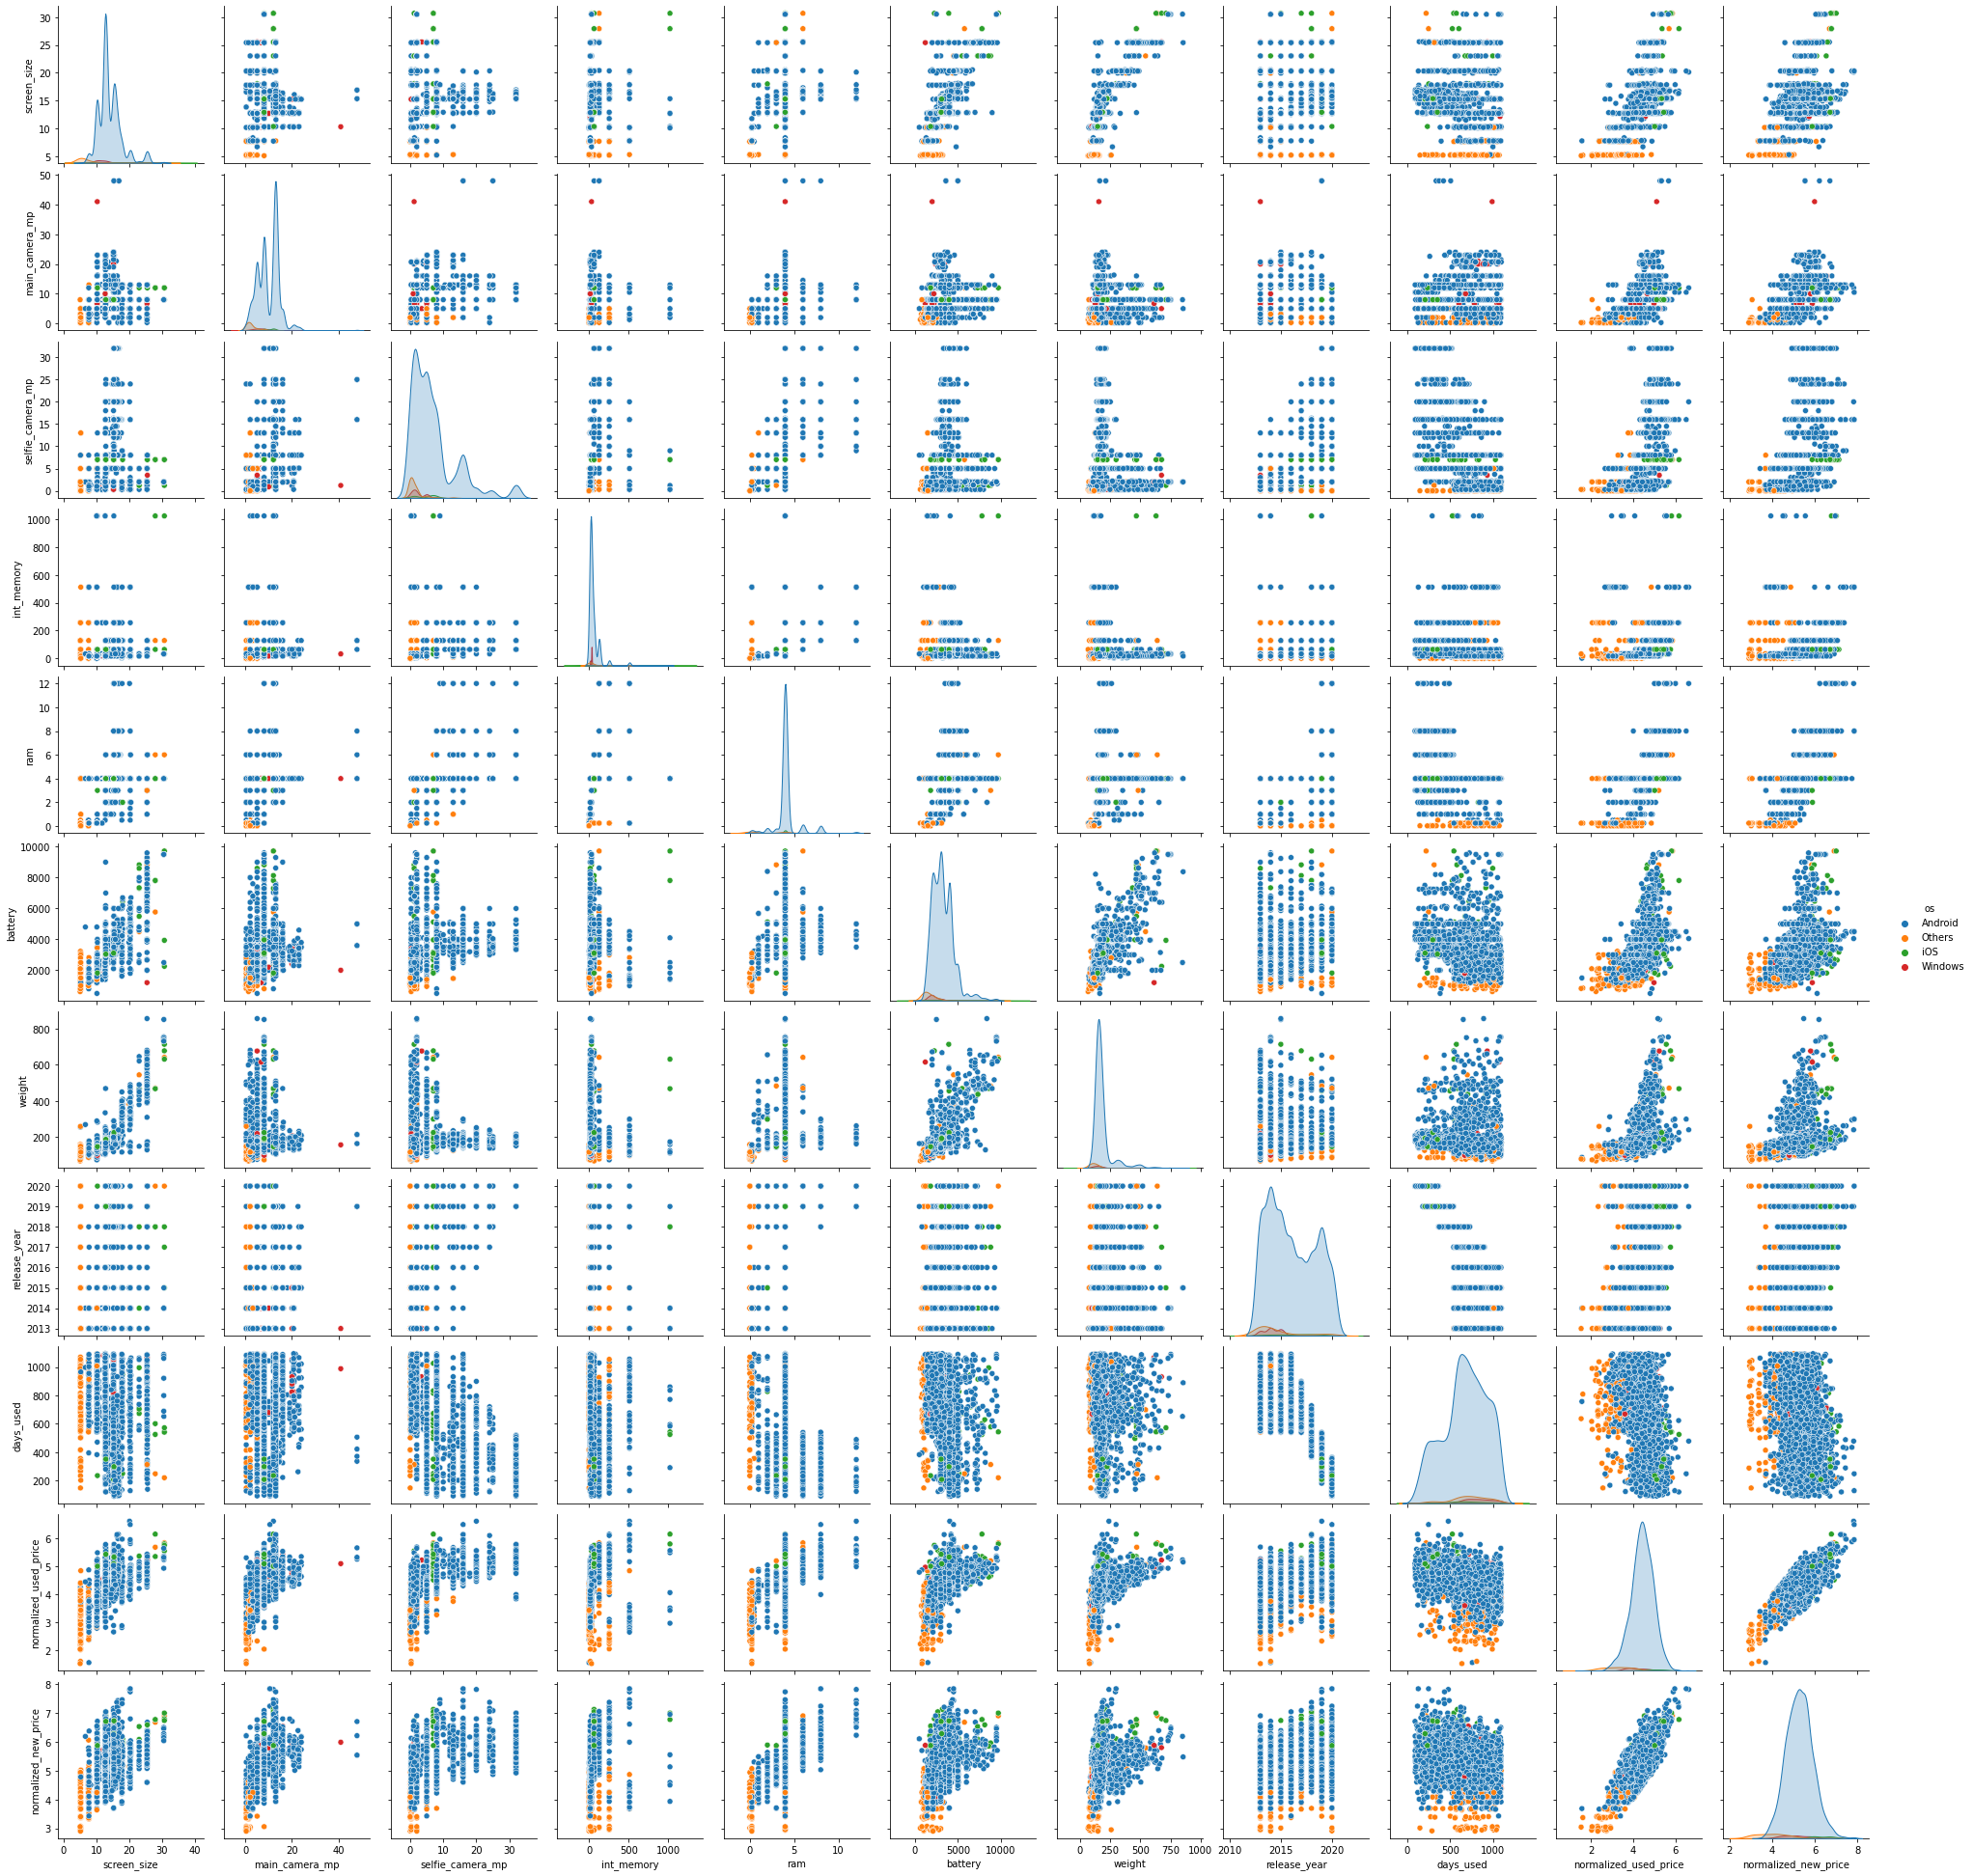

In [37]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()
sns.pairplot(data, hue='os');


* screen size has high correlation with both weight and battery
* Weight and Main camera mp have a negative correlation.
* Weight and selfie camera mp have no correlation.
* Normalized new price and normalized old price have the most obvious linear relationship.

#**Important points** :

**The distribution of normalized used and new device prices**

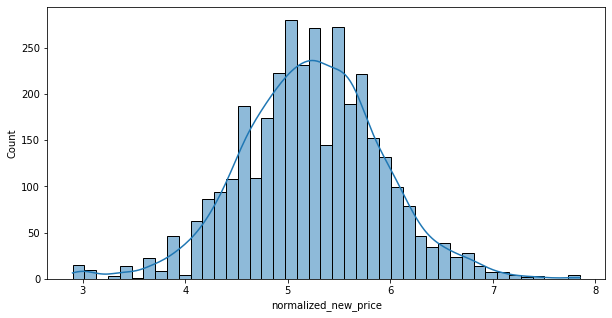

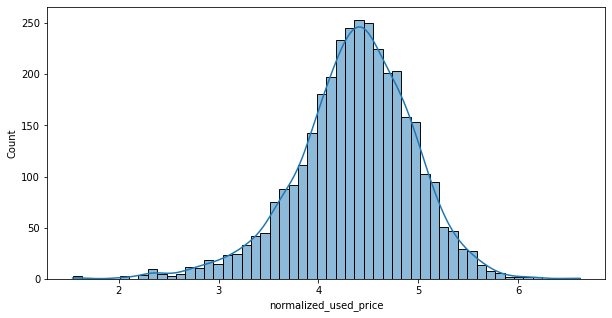

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data,x='normalized_new_price',kde=True);
plt.show()
plt.figure(figsize=(10, 5))
sns.histplot(data=df,x='normalized_used_price',kde=True);
plt.show()


* New prices and old prices are both normally distributed.

**The percentage of the used device market that is dominated by Android devices?**

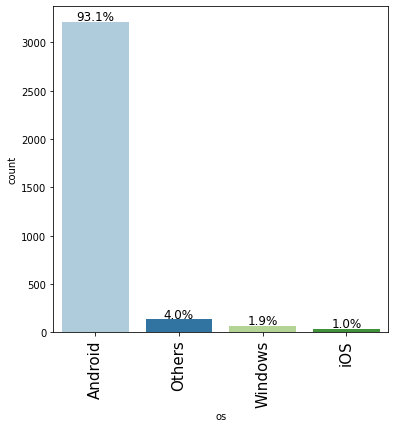

In [33]:
labeled_barplot(data, 'os', perc=True)

* 93.1 % of the used phone market is dominated by Android.

**How the amount of RAM vary with the brand?**

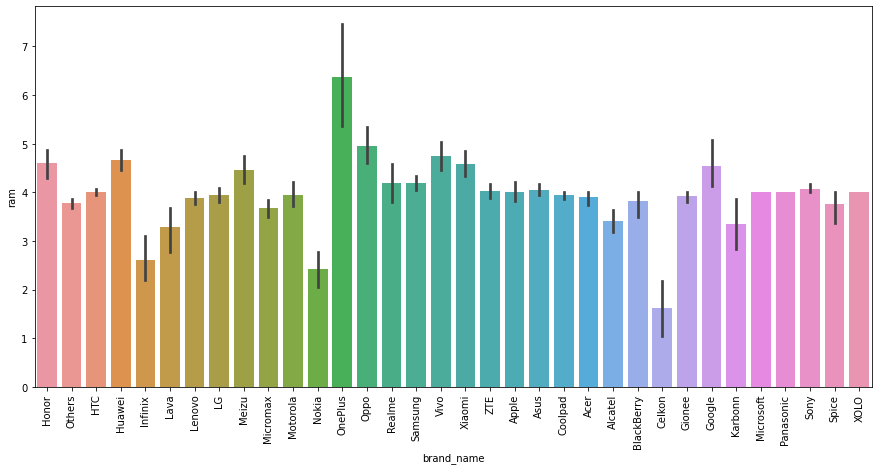

In [70]:
plt.figure(figsize=(15, 7))
sns.barplot(data=data, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

In [88]:
data.groupby("brand_name")["ram"].mean().sort_values(ascending=False)

brand_name
OnePlus       6.363636
Oppo          4.961240
Vivo          4.756410
Huawei        4.655378
Honor         4.603448
Xiaomi        4.583333
Google        4.533333
Meizu         4.451613
Samsung       4.199413
Realme        4.195122
Sony          4.069767
Asus          4.049180
ZTE           4.023214
HTC           4.000000
Apple         4.000000
XOLO          4.000000
Microsoft     4.000000
Panasonic     4.000000
Coolpad       3.954545
Motorola      3.943396
LG            3.936567
Gionee        3.933036
Acer          3.901961
Lenovo        3.885965
BlackBerry    3.829545
Others        3.777888
Spice         3.750000
Micromax      3.679487
Alcatel       3.407025
Karbonn       3.353448
Lava          3.277778
Infinix       2.600000
Nokia         2.420294
Celkon        1.613636
Name: ram, dtype: float64

* OnePlus has the highest ram while Celkon has the lowest ram amongst the brands.

**How the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [20]:
battery_weight = data[data.battery > 4500]
print(battery_weight.shape[0])

341


* There are 341 phones with batteries weighting more 4500mAh.

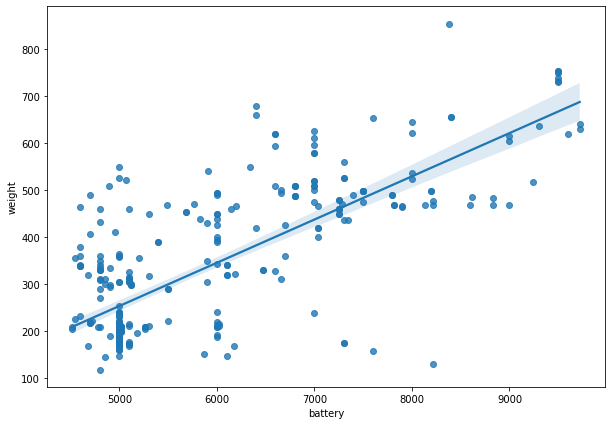

In [29]:
plt.figure(figsize = (10,7))
sns.regplot(data= battery_weight, x="battery", y="weight")
plt.show()

As seen from the distribution, as the battery increase, the weight increase as well.

**The number of phones and tablets are available across different brands with a screen size larger than 6 inches?**

* Convert 6 inches into cm, which is 15.4

In [18]:
screen_6 = data[data.screen_size > 15.24]
print(screen_6.shape[0])

1099


* The total number of phones with screen geater than 6 inches are 1099.

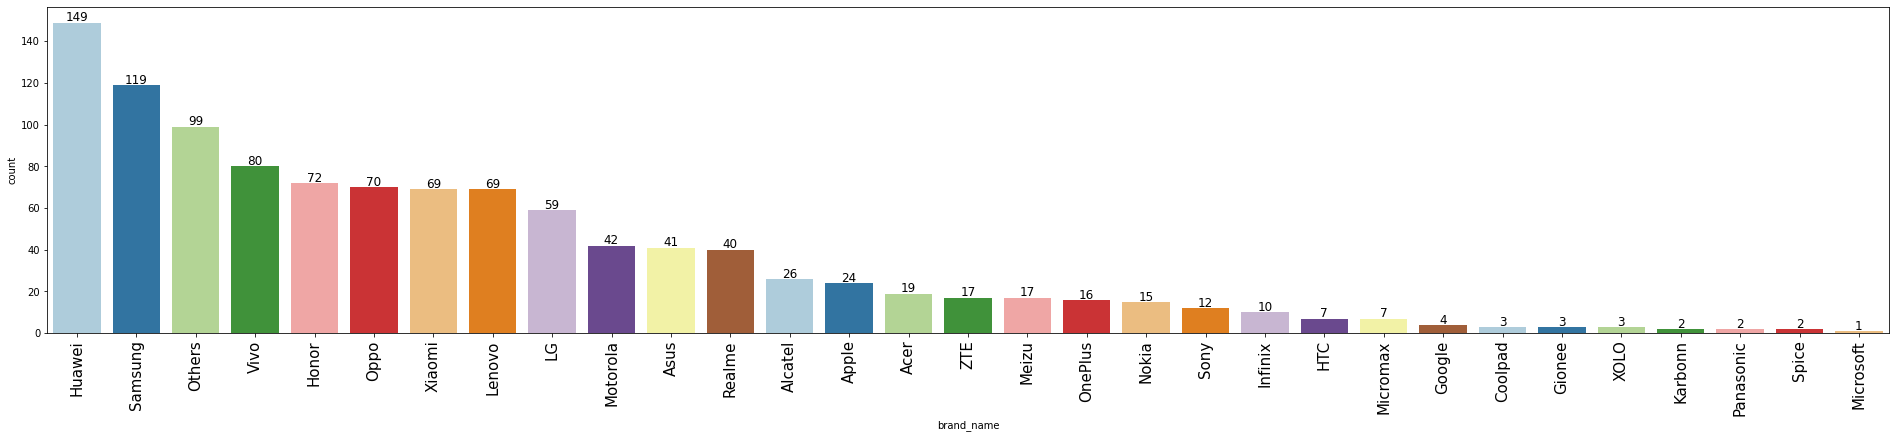

In [19]:
labeled_barplot(screen_6, "brand_name");

* Huawei has the most phones with screen larger than 6 inches while microsoft has the least.

**The distribution of devices offering greater than 8MP selfie cameras across brands**

In [13]:
selfie_8 = data[data.selfie_camera_mp > 8]
print(selfie_8.shape[0])

655


* There are 655 phones with selfie camera greater than 8mp.

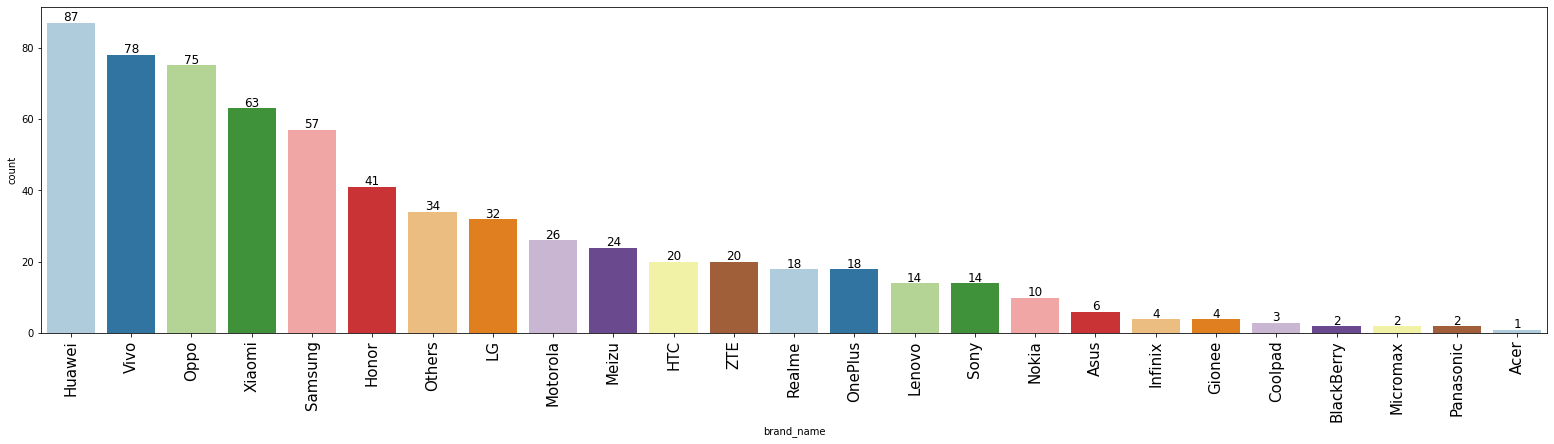

In [16]:
labeled_barplot(selfie_8, "brand_name");

* The top three brands with the most selfie camera that has more than 8mp are Huawei,vivo and Oppo repectively.

**Attributes that are highly correlated with the normalized price of a used device**

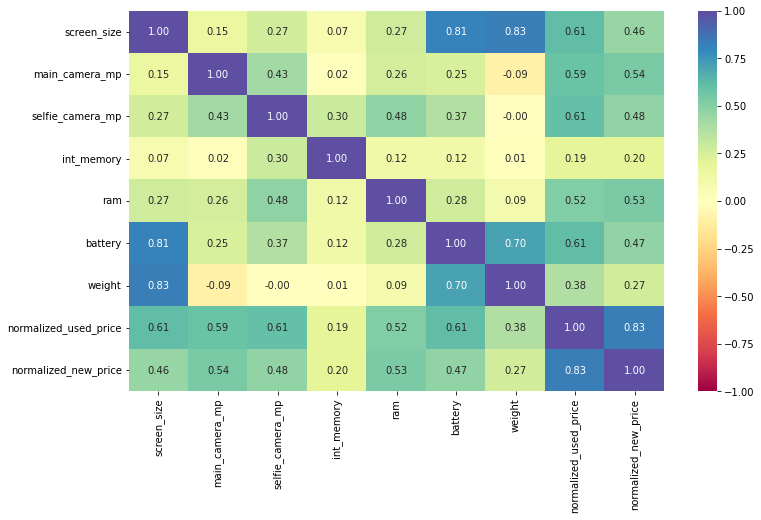

In [42]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()




* The correlation between normalized used price and normalized new price is 0.83.
* The correlation  between normalized used price and ram is 0.52
* The correlation between normalized used price and internal memeory 0.19
* The correlation between normalized used price and selfie camera is 0.61
* The correlation between normalized used price and battery is 0.61
* The correlation between normalized used price and main camera is 0.59
* The correlation between normalized used price and weight is 0.38
* The correlation between normalized used price and screen size is 0.61




#**Data Preprocessing**

**Missing Value Treatmen**

In [72]:
data.isnull().sum().sort_values(ascending = False)

main_camera_mp           179
weight                     7
battery                    6
int_memory                 4
ram                        4
selfie_camera_mp           2
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [24]:
data = data.fillna(data.median(numeric_only=True))

In [25]:
data.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

* missing values have been treated by using median.

**Feature Engineering**

* Since brand name is a catagorical value, it should be drop.
* 4g and 5g will be combined to create a new column so they can be replaced with their actual values.

In [26]:
data.drop(["brand_name"], axis=1, inplace=True)
data.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [27]:
data['generation'] = np.select([(data['4g'] == 'yes') & (data['5g'] == 'no'),
                         (data['4g'] == 'yes') & (data['5g'] == 'yes'),
                         (data['4g'] == 'no') & (data['5g'] == 'no')], \
                        ['4gen', '5gen', 'neither'])

In [28]:
data.drop(['4g', '5g'], axis=1, inplace=True)

In [29]:
data['generation'].value_counts()

4gen       2183
neither    1119
5gen        152
Name: generation, dtype: int64

* 4g and 5g have been dropped and added to a new column with their actual values.

**Outlier detection and treatment**

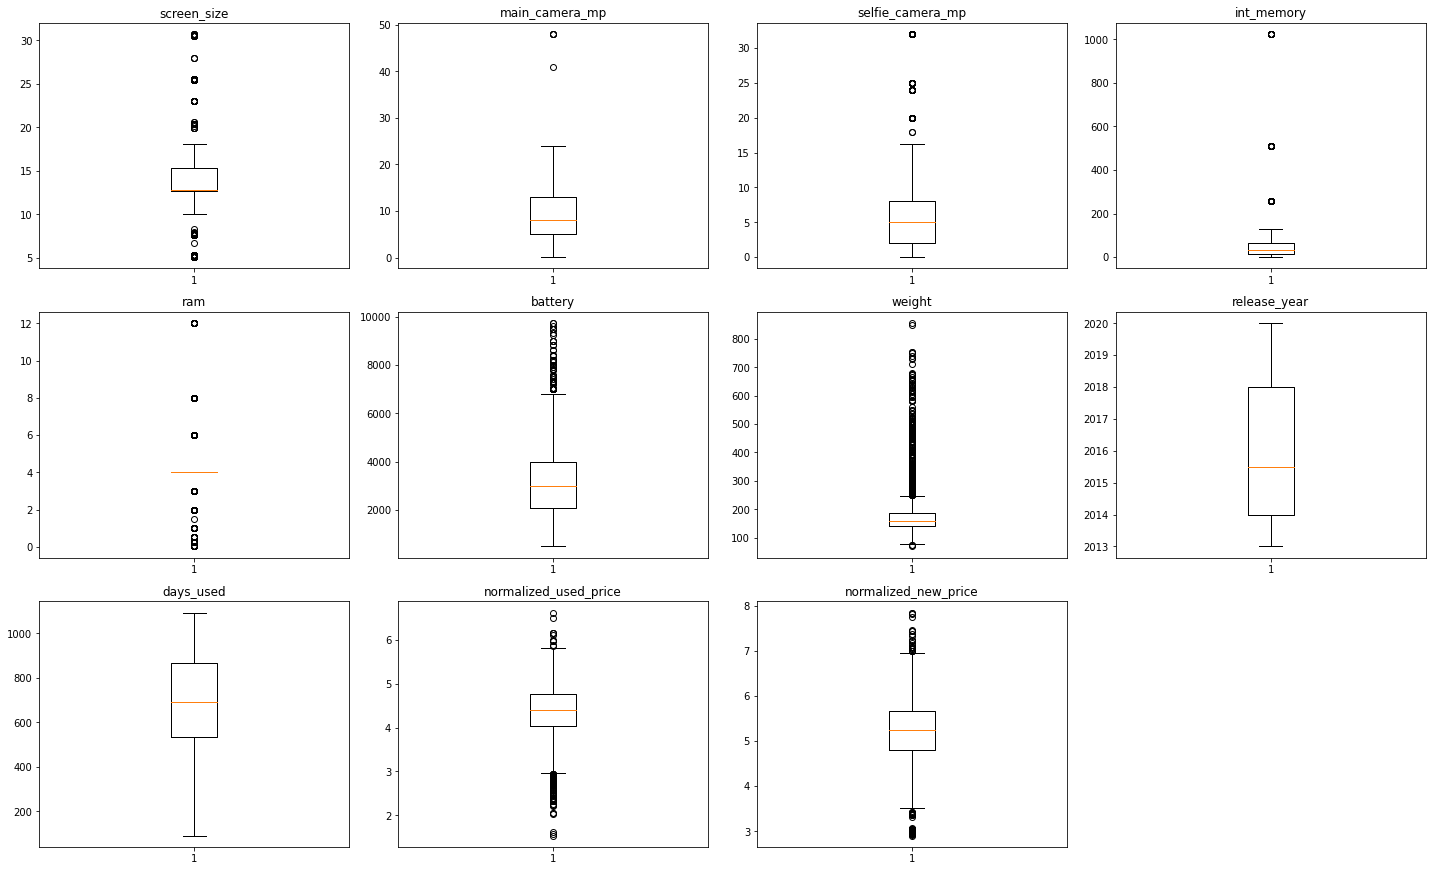

In [81]:
plt.figure(figsize=(20, 20))
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* Outliers are present in several of the columns.
* Treating these outliers may not be a good ideas since we already computed the means each column and replaced in place of missing values and  these outliers are part of the observation and they might affect the results.

##**EDA**

In [83]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3454.0,9.384534,4.700148,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3454.0,6.553329,6.968453,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3454.0,54.546957,84.926611,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3454.0,4.036080,1.364314,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3454.0,3133.170961,1298.565062,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3454.0,182.705761,88.329494,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


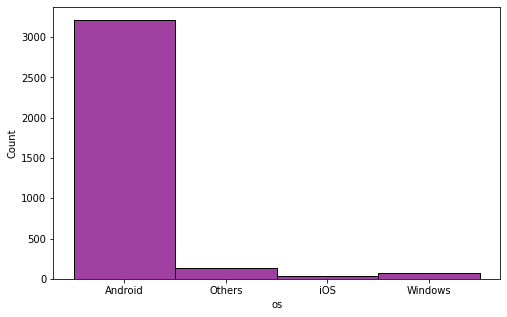

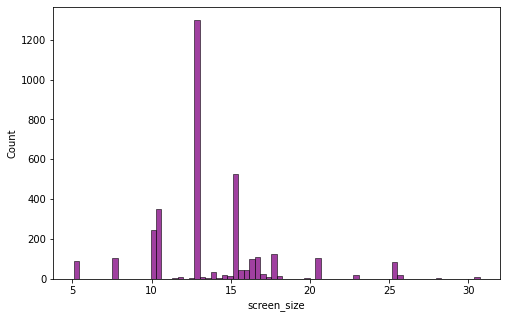

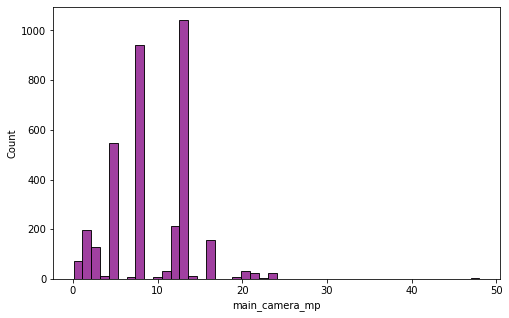

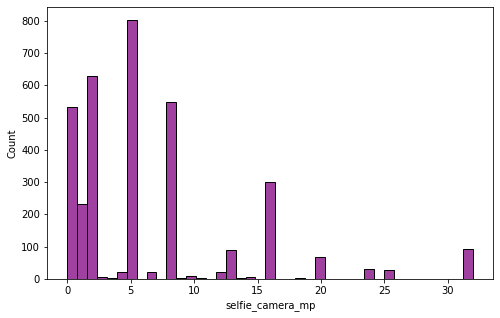

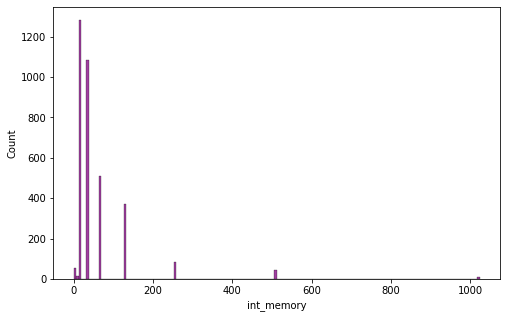

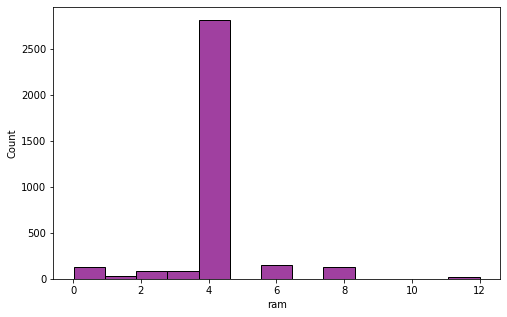

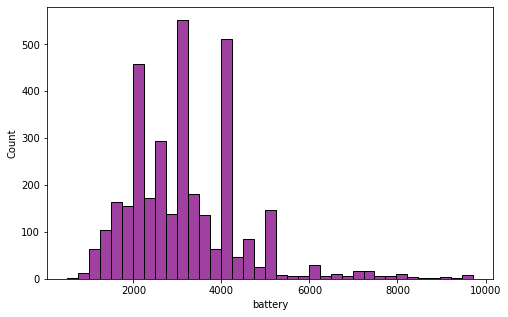

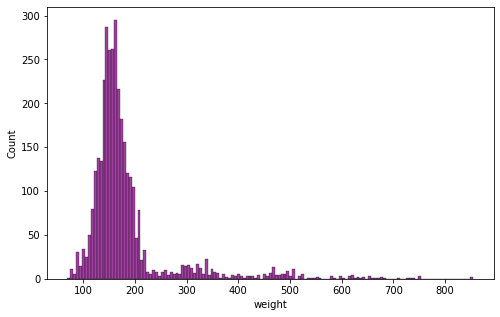

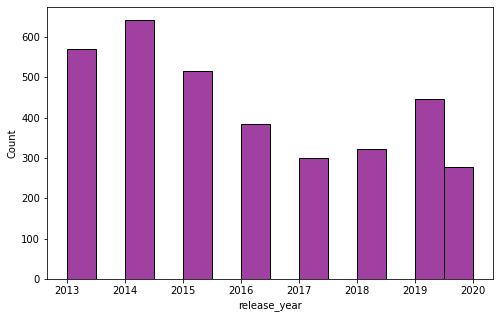

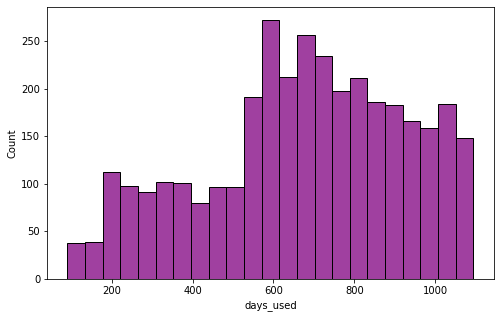

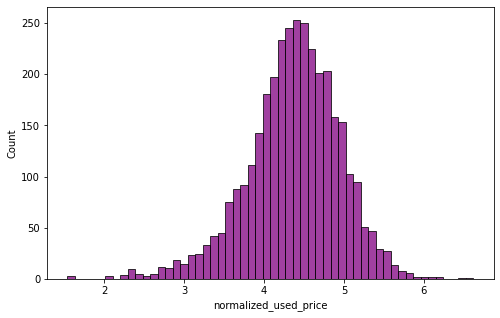

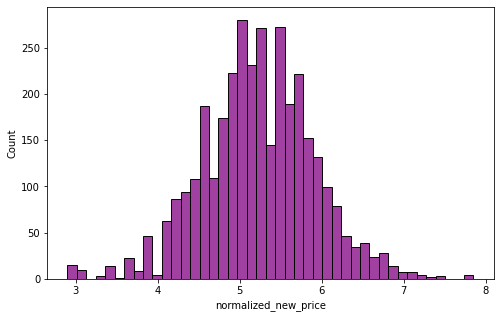

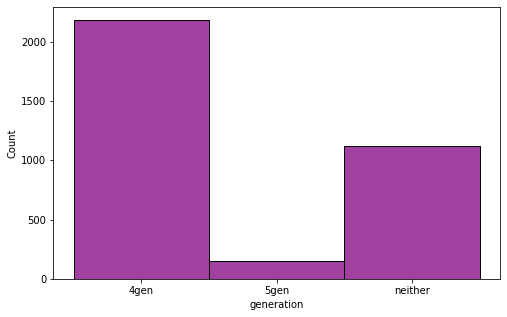

In [86]:
for i in data.columns:
    plt.figure(figsize = (8,5))
    sns.histplot(data = data, x = i, color= "purple")
    plt.show;

**Preparing data for modeling**

* Encode categorical features.

In [30]:
X = data.drop(['normalized_used_price'], axis =1)
y = data['normalized_used_price']
print(X.head())
print(y.head())

        os  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0  Android        14.50            13.0               5.0        64.0  3.0   
1  Android        17.30            13.0              16.0       128.0  8.0   
2  Android        16.69            13.0               8.0       128.0  8.0   
3  Android        25.50            13.0               8.0        64.0  6.0   
4  Android        15.32            13.0               8.0        64.0  3.0   

   battery  weight  release_year  days_used  normalized_new_price generation  
0   3020.0   146.0          2020        127              4.715100       4gen  
1   4300.0   213.0          2020        325              5.519018       5gen  
2   4200.0   213.0          2020        162              5.884631       5gen  
3   7250.0   480.0          2020        345              5.630961       5gen  
4   5000.0   185.0          2020        293              4.947837       4gen  
0    4.307572
1    5.162097
2    5.111084
3    5.135387
4

In [31]:
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [32]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price,os_Others,os_Windows,os_iOS,generation_5gen,generation_neither
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100,0,0,0,0,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018,0,0,0,1,0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631,0,0,0,1,0
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961,0,0,0,1,0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837,0,0,0,0,0


* Splitting the data in 70:30 ratio for train to test data

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [93]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


##**Model Building - Linear Regression**

In [34]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     847.8
Date:                   Wed, 23 Nov 2022   Prob (F-statistic):               0.00
Time:                           17:31:39   Log-Likelihood:                 95.399
No. Observations:                   2417   AIC:                            -158.8
Df Residuals:                       2401   BIC:                            -66.15
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

####**Interpreting the Regression Results**


**Adjusted. R-squared**
* The value for adj. R-squared is 0.84. a higher value generally indicates a better fit so in this case it is good.

**const coefficient: It is the Y-intercept.**
* which is -53.114.

**Coefficient of a predictor variable**
* It represents the change in the output Y due to a change in the predictor variable. The coefficient of
normalized_new_price is equal to 0.4202.




####**Model Performance Check**

computing compute adjusted R-squared, MAPE and compute different metrics to check performance of a regression model

In [6]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100



def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  
    adjr2 = adj_r2_score(predictors, target, pred)  
    rmse = np.sqrt(mean_squared_error(target, pred))  
    mae = mean_absolute_error(target, pred)  
    mape = mape_score(target, pred)  

 
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

Checking model performance on train set (seen 70% data)

In [4]:
from sklearn.metrics import r2_score

In [35]:
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232606,0.182847,0.84119,0.840132,4.389688


In [36]:
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236969,0.182516,0.84431,0.841867,4.458332


* The training R2 is 0.841, so the model is not underfitting.
* The train and test RMSE and MAE are comparable, so the model is not overfitting either. 
* MAE suggests that the model can predict the price of a used device within a mean error of 0.182 on the test data.
* MAPE of 4.46 on the test data means that we are able to predict within 4.5% of the used device price.

###**Checking Linear Regression Assumptions**

**1. Test for multicollinerity** 

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

   
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [39]:
checking_vif(x_train)

,feature,VIF
0,const,3.575544e+06
1,screen_size,7.257522e+00
2,main_camera_mp,1.924868e+00
3,selfie_camera_mp,2.572363e+00
4,int_memory,1.247150e+00
5,ram,2.103621e+00
6,battery,3.835618e+00
7,weight,6.120544e+00
8,release_year,4.613026e+00
9,days_used,2.589619e+00


* Columns with very high VIF values indicate presence of strong multicollinearity. 
* We will  drop these columns with VIF > 5.
* In this case, screen_size and weight have high VIF values so we will treat them first. 

In [40]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [41]:
col_list = ['screen_size', 'weight']
res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.836986,0.235714
1,screen_size,0.836471,0.236086


In [42]:
col_to_drop = 'weight'
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,3.446701e+06
1,screen_size,3.388518e+00
2,main_camera_mp,1.842709e+00
3,selfie_camera_mp,2.537169e+00
4,int_memory,1.246894e+00
5,ram,2.100018e+00
6,battery,3.463821e+00
7,release_year,4.442759e+00
8,days_used,2.574507e+00
9,normalized_new_price,2.652817e+00


* we have dealt with multicollinearity of the data.
* we have also dropped weight which brought the VIF of screen size down to 3.3

In [43]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     887.1
Date:                   Wed, 23 Nov 2022   Prob (F-statistic):               0.00
Time:                           17:50:33   Log-Likelihood:                 70.841
No. Observations:                   2417   AIC:                            -111.7
Df Residuals:                       2402   BIC:                            -24.83
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

* We can see that adj. R-squared has dropped from 0.841 to 0.837, which shows that the dropped columns did not have much effect on the model.

**Dealing with high p-value variables**

In [45]:
predictors = x_train2.copy()
cols = predictors.columns.tolist()


max_p_value = 1

while len(cols) > 0:
  
    x_train_aux = predictors[cols]

   
    model = sm.OLS(y_train, x_train_aux).fit()

    
    p_values = model.pvalues
    max_p_value = max(p_values)

   
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'release_year', 'normalized_new_price', 'generation_neither']


In [46]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [47]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1774.
Date:                   Wed, 23 Nov 2022   Prob (F-statistic):               0.00
Time:                           18:02:23   Log-Likelihood:                 67.613
No. Observations:                   2417   AIC:                            -119.2
Df Residuals:                       2409   BIC:                            -72.90
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [48]:
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235296,0.184628,0.837497,0.836957,4.428306


In [50]:
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239126,0.183996,0.841462,0.840228,4.487442


* Now no feature has p-value greater than 0.05, so we'll consider the features in x_train3 as the final set of predictor variables and olsmod2 as the final model to move forward with.
* Now adjusted R-squared is 0.837 which means our model is able to explain 84% of the variance
* The adjusted R-squared in olsmod1 was 0.837, this shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets which means the model is not overfitting.

**2. Test for linearity and independence**

In [51]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  
df_pred["Fitted Values"] = olsmod2.fittedvalues  
df_pred["Residuals"] = olsmod2.resid  

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.865253,0.222235
1525,4.448399,4.581051,-0.132651
1128,4.315353,4.286071,0.029282
3003,4.282068,4.258824,0.023244
2907,4.456438,4.459768,-0.003330


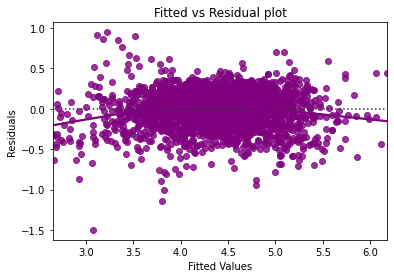

In [52]:
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* There is no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

**3. Test for normality**

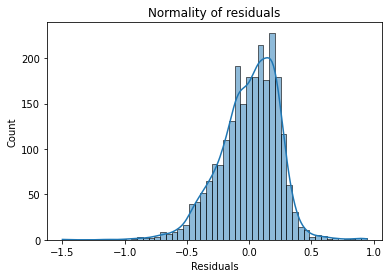

In [54]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

* The histogram of residuals does have a bell shape.

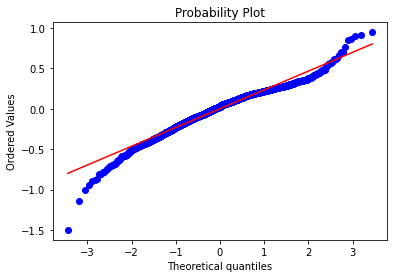

In [55]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* In the above Q-Q plot,the residuals more or less follow a straight line except for the tails.

In [56]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9720368981361389, pvalue=2.5155909423510455e-21)

* Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
* Strictly speaking, the residuals are not normal.
* However, as an approximation, we can accept this distribution as close to being normal.
So, the assumption is satisfied.

**4. Test for Homoscedasticity**

In [57]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.060636233161716), ('p-value', 0.15396417020157535)]

* Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

###**Predictions on test data**

In [58]:
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.372173
2341,3.696103,3.948479
1913,3.592093,3.773145
688,4.306495,4.122100
650,4.522115,5.125297
2291,4.259294,4.396075
40,4.997685,5.436294
1884,3.875359,4.099737
2538,4.206631,4.056164
45,5.380450,5.320197


* This model has returned good prediction results and the actual and predicted values are comparable

##**Final Mode**

In [59]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [60]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1774.
Date:                   Wed, 23 Nov 2022   Prob (F-statistic):               0.00
Time:                           18:22:29   Log-Likelihood:                 67.613
No. Observations:                   2417   AIC:                            -119.2
Df Residuals:                       2409   BIC:                            -72.90
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [61]:
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235296,0.184628,0.837497,0.836957,4.428306


In [62]:
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239126,0.183996,0.841462,0.840228,4.487442


* The model is able to explain 84% of the variation in the data
* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting. 
* The MAPE on the test set suggests we can predict within 4.5% the used devices prices.
* we can conclude the model olsmodel_final is good for prediction as well as inference purposes.

##**Conclusions and Recommendations**

**Conclusion**
* The model is able to explain 84% of the variation in the data and within 4.5% of Used price on the test data, which is good. This indicates that the model is good for prediction as well as inference purposes
* If the Screen size of a device increase by one unit, then the price of a refurbished devices increases by 0.0431 units.
* If the main camera mp of a device increase by one unit, then the price of a refurbished devices increases by 0.0186 units.
* If the selfie camera and ran of a device increase by one unit, then the price of a refurbished devices increases by 0.0132 and 0.0186 units repecively.

* Normalized new price and normalized used price are highly correlated. 
  * If the normalized new price of a device increase by one unit, then the price of a refurbished devices increases by 0.424 units.

  * This means in this market the price of the same types of phone on the refurbished market will increase proportionally to the price of a new device.
* generation neither has a negative coef. which means phone or tablet without 4g and 5g technology are cheaper.

**Recomendations**
* Form the above analysis and prediction we can conlclude that a used/ new phones or tablets depends on several factors such screen size, front and back camera, ram, release year, oprating system and other variables.
* But from the data point of view, new devices that are desireable by customers are remain desireable as refubrished product. So as a business the company should focus on popular brand, oprating system, and other factors such as release year and screen size to attract more customer to this market.
